In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [2]:
# Reading your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [13]:
# Fetching the Carnival news articles
carnival_headlines = newsapi.get_everything(q="carnival cruise stock and covid", language="en")#, from_param="2020-12-15", to="2021-01-15")

In [17]:
# Fetching the Ethereum news articles
sp500_headlines = newsapi.get_everything(q="sp500 performance and covid", language="en")

In [16]:
# Creating the Bitcoin sentiment scores DataFrame
carnival_sentiments = []

for article in carnival_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        carnival_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
carnival_df = pd.DataFrame(carnival_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
carnival_df = carnival_df[cols]
carnival_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.8225,0.227,0.740,0.033,The coronavirus pandemic crisis shows no signs...
1,0.9022,0.000,0.696,0.304,"(Reuters) -U.S. stocks rose on Wednesday, led ..."
2,0.0000,0.000,1.000,0.000,"(Adds closing levels)\r\nNEW YORK, Dec 31 (Reu..."
3,0.4215,0.000,0.926,0.074,"(For a Reuters live blog on U.S., UK and Europ..."
4,0.4215,0.000,0.926,0.074,"(For a Reuters live blog on U.S., UK and Europ..."


In [18]:
# Creating the ethereum sentiment scores DataFrame
sp500_sentiments = []

for article in sp500_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        sp500_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
sp500_df = pd.DataFrame(sp500_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
sp500_df = sp500_df[cols]
sp500_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.1796,0.115,0.780,0.105,<ul><li>Second half economic recovery to drive...
1,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ..."
2,-0.6395,0.194,0.806,0.000,"By Charles Lynn Bolin I wont grow up,I dont wa..."
3,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ..."


In [19]:
# Describing the Bitcoin Sentiment
carnival_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,-0.028685,0.051100,0.902350,0.046500
std,0.443155,0.093279,0.124251,0.074626
min,-0.848100,0.000000,0.632000,0.000000
25%,-0.114700,0.000000,0.796250,0.000000
50%,0.000000,0.000000,0.967500,0.000000
75%,0.068300,0.033000,1.000000,0.068000
max,0.902200,0.242000,1.000000,0.304000


In [ ]:
# Describing the Ethereum Sentiment
sp500_df.describe()

# Questions:
Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

# Tokenizer
In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:

   1.Lowercase each word
   2.Remove Punctuation
   3.Remove Stopwords

In [20]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [21]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [22]:
# Completing the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Expanding the default stopwords list if necessary
    sw = stopwords.words("english")
    sw.append("seen")
    sw.append("char")
    sw.append("file")
    sw.append("dado")
    sw.append("chars")
    sw.append("staff")
    sw.append("photo")
    sw.append("since")
    sw.append("taken")
    sw.append("illustration")
    sw.append("representation")
    
    # cleaning text   
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    # Removing the punctuation
    words = word_tokenize(re_clean)
    # Converting the words to lowercase
    words = [word.lower() for word in words]
    # Removing the stop words
    words = [word for word in words if word not in sw]
    # Lemmatizing Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    
    return tokens

In [23]:
# Creating a new tokens column for bitcoin
carnival_df["tokens"] = carnival_df["text"].apply(tokenizer)
carnival_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.8225,0.227,0.740,0.033,The coronavirus pandemic crisis shows no signs...,"[coronavirus, pandemic, crisis, show, sign, ab..."
1,0.9022,0.000,0.696,0.304,"(Reuters) -U.S. stocks rose on Wednesday, led ...","[reuters, u, stock, rose, wednesday, led, ener..."
2,0.0000,0.000,1.000,0.000,"(Adds closing levels)\r\nNEW YORK, Dec 31 (Reu...","[add, closing, level, new, york, dec, reuters,..."
3,0.4215,0.000,0.926,0.074,"(For a Reuters live blog on U.S., UK and Europ...","[reuters, live, blog, u, uk, european, stock, ..."
4,0.4215,0.000,0.926,0.074,"(For a Reuters live blog on U.S., UK and Europ...","[reuters, live, blog, u, uk, european, stock, ..."


In [24]:
# Creating a new tokens column for ethereum
sp500_df["tokens"] = sp500_df["text"].apply(tokenizer)
sp500_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.1796,0.115,0.780,0.105,<ul><li>Second half economic recovery to drive...,"[ul, li, second, half, economic, recovery, dri..."
1,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ...","[everybody, indexed, word, could, use, chaos, ..."
2,-0.6395,0.194,0.806,0.000,"By Charles Lynn Bolin I wont grow up,I dont wa...","[charles, lynn, bolin, wont, grow, dont, want,..."
3,-0.8126,0.194,0.766,0.041,"If everybody indexed, the only word you could ...","[everybody, indexed, word, could, use, chaos, ..."


# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin.

   1. Use NLTK to produce the n-grams for N = 2.
   2. List the top 10 words for each coin.

In [25]:
from nltk import ngrams
from collections import Counter

In [27]:
# Generating the Bitcoin N-grams where N=2!
carnival_text = carnival_df["text"].str.cat()
clean_carnival_text =  tokenizer(carnival_text)
bigram_counts = Counter(ngrams(clean_carnival_text, n=2))
bigram_counts.most_common(20)

[(('wall', 'street'), 8),
 (('new', 'york'), 5),
 (('reuters', 'year'), 5),
 (('year', 'wild'), 5),
 (('wild', 'one'), 5),
 (('one', 'wall'), 5),
 (('street', 'bookended'), 5),
 (('bookended', 'end'), 5),
 (('end', 'longest'), 5),
 (('longest', 'bull'), 5),
 (('bull', 'market'), 5),
 (('market', 'history'), 5),
 (('history', 'battering'), 5),
 (('live', 'blog'), 5),
 (('blog', 'u'), 5),
 (('stock', 'market'), 5),
 (('market', 'click'), 5),
 (('type', 'live'), 5),
 (('live', 'news'), 5),
 (('news', 'window'), 5)]

In [28]:
# Generating the Ethereum N-grams where N=2
sp500_text = sp500_df["text"].str.cat()
clean_sp500_text =  tokenizer(sp500_text)
bigram_E_counts = Counter(ngrams(clean_sp500_text, n=2))
bigram_E_counts.most_common(20)

[(('li', 'li'), 2),
 (('everybody', 'indexed'), 2),
 (('indexed', 'word'), 2),
 (('word', 'could'), 2),
 (('could', 'use'), 2),
 (('use', 'chaos'), 2),
 (('chaos', 'catastrophe'), 2),
 (('catastrophe', 'market'), 2),
 (('market', 'would'), 2),
 (('would', 'fail'), 2),
 (('fail', 'john'), 2),
 (('john', 'bogle'), 2),
 (('bogle', 'may'), 2),
 (('may', 'try'), 2),
 (('try', 'buy'), 2),
 (('buy', 'asset'), 2),
 (('asset', 'discount'), 2),
 (('discount', 'rather'), 2),
 (('rather', 'earnings'), 2),
 (('earnings', 'earnings'), 2)]

In [30]:
# Using the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Getting the top 10 words for Bitcoin
token_count(clean_carnival_text, N=10)

[('market', 16),
 ('reuters', 16),
 ('live', 14),
 ('u', 10),
 ('new', 9),
 ('wall', 8),
 ('street', 8),
 ('stock', 7),
 ('year', 7),
 ('coronavirus', 6)]

In [32]:
# Getting the top 10 words for Ethereum
token_count(clean_sp500_text, N=10)

[('li', 5),
 ('earnings', 4),
 ('may', 3),
 ('half', 2),
 ('everybody', 2),
 ('indexed', 2),
 ('word', 2),
 ('could', 2),
 ('use', 2),
 ('chaos', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
import numpy as np
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

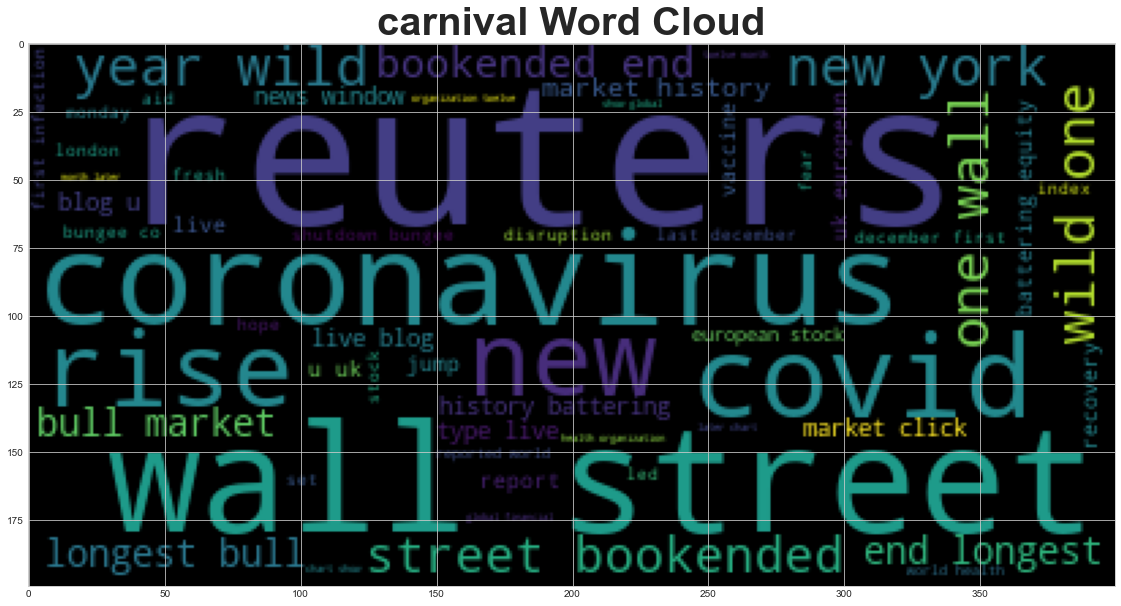

In [34]:
# Generating the Bitcoin word cloud
big_string = '. '.join(clean_carnival_text)
wc = WordCloud().generate(big_string)
plt.title("carnival Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

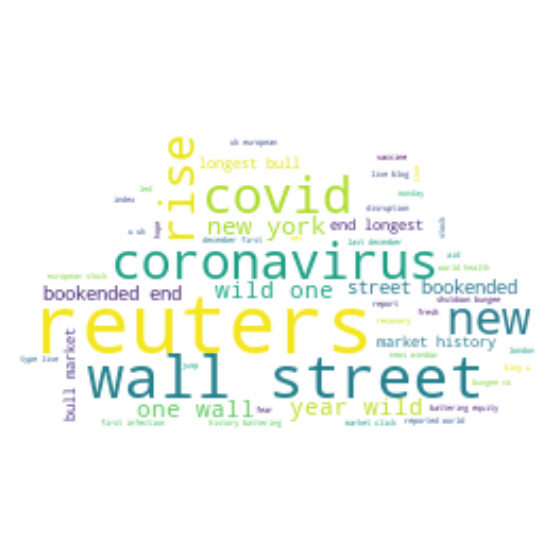

In [35]:
# Generating the Bitcoin word cloud (masked image)
b_mask = np.array(Image.open('images/cloud_bubble.png'))
b_wordcloud = WordCloud(background_color="white", mask=b_mask).generate(big_string)
plt.figure()
plt.imshow(b_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

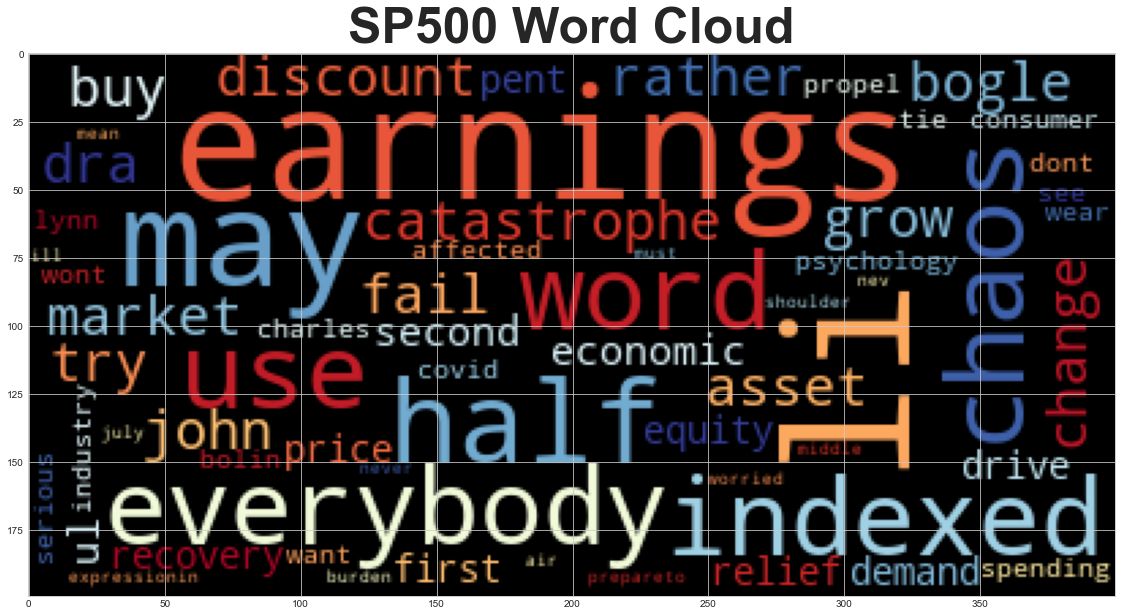

In [36]:
# Generating the Ethereum word cloud
big_string_1 = ' '.join(clean_sp500_text)
wc = WordCloud(colormap="RdYlBu").generate(big_string_1)
plt.title("SP500 Word Cloud", fontsize=50, loc="center", fontweight="bold")
plt.imshow(wc)
plt.imshow(wc)

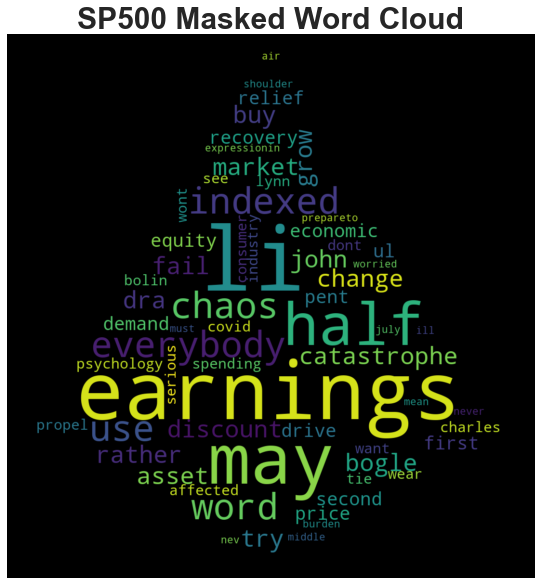

In [37]:
# Generating the Ethereum word cloud (masked image)
e_mask = np.array(Image.open('images/ethereum_logo.png'))
e_wordcloud = WordCloud(mask=e_mask).generate(big_string_1)
plt.figure()
plt.imshow(e_wordcloud, interpolation="bilinear")
plt.title("SP500 Masked Word Cloud", fontsize=30, loc="center", fontweight="bold")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm') 

# Bitcoin NER

In [40]:
# Concatenating all of the bitcoin text together
carnival_text

'The coronavirus pandemic crisis shows no signs of abating, even with a vaccine coming on to the markets. Were still facing severe social lockdown policies, with a number of states (such as California… [+8925 chars](Reuters) -U.S. stocks rose on Wednesday, led by energy shares, as investors bet on a strong economic recovery in 2021 on the back of COVID-19 vaccine rollouts and hopes of bigger fiscal support.\r\nFI… [+3110 chars](Adds closing levels)\r\nNEW YORK, Dec 31 (Reuters) - The year 2020 was a wild one for Wall Street, bookended by the end of the longest bull market in history with the battering of equities by the COVI… [+3409 chars](For a Reuters live blog on U.S., UK and European stock markets, click LIVE/ or type LIVE/ in a news window)\r\n* Markets rise on recovery hopes\r\n* Tesla up on report of India entry next year\r\n* Airlin… [+2994 chars](For a Reuters live blog on U.S., UK and European stock markets, click LIVE/ or type LIVE/ in a news window)\r\n* Markets rise on rec

In [41]:
# Running the NER processor on all of the text
doc = nlp(carnival_text)
# Adding a title to the document
doc.user_data["title"] = "Carnival NER"

In [42]:
# Rendering the visualization
displacy.render(doc, style='ent')

In [43]:
# Listing all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

California GPE
Wednesday DATE
2021 DATE
NEW YORK GPE
Dec 31 DATE
Reuters ORG
The year 2020 DATE
COVI ORG
Reuters ORG
U.S. GPE
UK GPE
European NORP
Tesla ORDINAL
India GPE
next year DATE
Reuters ORG
U.S. GPE
UK GPE
European NORP
Tesla ORDINAL
India GPE
next year DATE
YORK PERSON
Reuters ORG
The year 2020 DATE
YORK PERSON
Reuters ORG
The year 2020 DATE
YORK PERSON
Reuters ORG
The year 2020 DATE
+3763 chars]U.S. Regulatory News ORG
Chuck Mikolajczak PERSON
NEW YORK GPE
Dec 31 DATE
Reuters ORG
The year 2020 DATE
500 CARDINAL
Monday DATE
Britain GPE
Monday DATE
Britain GPE
U.S. GPE
Feds NORP
U.S. Congress ORG
Stephens CARDINAL
0.22% PERCENT
500 CARDINAL
0.12% PERCENT
Nasdaq ORG
0.20% PERCENT
mid-afternoon TIME
Reuters ORG
U.S. GPE
UK GPE
European NORP
U.S. Senate ORG
2,000 MONEY
Reuters ORG
U.S. GPE
UK GPE
European NORP
U.S. Senate ORG
2,000 MONEY
Tuesday DATE
the final days DATE
Reuters ORG
Last December DATE
first ORDINAL
the World Health Organization ORG
Twelve months later DATE
Reuters 

# SP500 NER

In [44]:
# Concatenating all of the bitcoin text together
sp500_text

'<ul><li>Second half economic recovery to drive first half equity prices.</li><li>Pent-up demand and relief psychology to propel consumer spending.</li><li>Industries most affected by COVID-19 may see… [+13923 chars]If everybody indexed, the only word you could use is chaos, catastrophe The markets would fail."\r\n- John Bogle, May 2017\r\nTry to buy assets at a discount rather than earnings. Earnings can change dra… [+13278 chars]By Charles Lynn Bolin I wont grow up,I dont want to wear a tie.Or a serious expressionIn the middle of July.And if it means I must prepareTo shoulder burdens with a worried air,Ill never grow up, nev… [+29202 chars]If everybody indexed, the only word you could use is chaos, catastrophe The markets would fail."\r\n- John Bogle, May 2017\r\nTry to buy assets at a discount rather than earnings. Earnings can change dra… [+18820 chars]'

In [45]:
# Running the NER processor on all of the text
doc_1 = nlp(sp500_text)
# Adding a title to the document
doc_1.user_data["title"] = "sp500 NER"

In [46]:
# Rendering the visualization
displacy.render(doc_1, style='ent')

In [47]:
# Listing all Entities
for ent in doc_1.ents:
    print(ent.text, ent.label_)

<ul><li ORG
Second ORDINAL
first ORDINAL
half CARDINAL
John Bogle PERSON
May 2017 DATE
Charles Lynn Bolin PERSON
expressionIn CARDINAL
the middle of July DATE
Ill PERSON
nev PERSON
John Bogle PERSON
May 2017 DATE
